# Import Required Libraries

In [102]:
# Basic Libraries
import pandas as pd
import numpy as np

# Preprocessing & NLP
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Machine Learning Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Deep Learning (Optional CNN later)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Warnings
import warnings
warnings.filterwarnings('ignore')


# Load and Prepare Data

In [103]:
# Load the dataset
df = pd.read_csv(r"C:\Users\Lenovo\Downloads\Instagram_Posts.csv")

In [104]:
df

,username,caption,image_quality,comments,likes,followers,is_fake
0,garciamarcus,Technology ready hit travel age provide. doubl...,medium,1,100,912,1
1,ericlawrence,Item situation seem doctor couple have doctor ...,high,158,403,5667,0
2,katie11,Single actually important conference eight add...,high,176,316,8743,0
3,garycarlson,Report street drive allow region. guaranteed i...,low,18,55,407,1
4,catherine62,Really interview discussion data. double your ...,low,17,39,945,1
...,...,...,...,...,...,...,...
2995,bryan36,Inside such above edge watch traditional. behi...,high,71,448,2157,0
2996,dburton,Significant identify country certain. double y...,low,9,45,552,1
2997,breanna29,Free physical heavy most. special discount,high,192,261,3239,0
2998,wgonzalez,Industry later determine full accept realize t...,low,19,19,967,1


In [107]:
# Check the structure
df.head()

,username,caption,image_quality,comments,likes,followers,is_fake
0,garciamarcus,Technology ready hit travel age provide. doubl...,medium,1,100,912,1
1,ericlawrence,Item situation seem doctor couple have doctor ...,high,158,403,5667,0
2,katie11,Single actually important conference eight add...,high,176,316,8743,0
3,garycarlson,Report street drive allow region. guaranteed i...,low,18,55,407,1
4,catherine62,Really interview discussion data. double your ...,low,17,39,945,1


# Data Cleaning

In [109]:
# Function to clean text data
def clean_caption(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # remove links
    text = re.sub(r'\W', ' ', text)  # remove special characters
    text = re.sub(r'\s+', ' ', text).strip()  # remove extra spaces
    return text

In [111]:
# Apply text cleaning
df['clean_caption'] = df['caption'].apply(clean_caption)

In [112]:
df

,username,caption,image_quality,comments,likes,followers,is_fake,clean_caption
0,garciamarcus,Technology ready hit travel age provide. doubl...,medium,1,100,912,1,technology ready hit travel age provide double...
1,ericlawrence,Item situation seem doctor couple have doctor ...,high,158,403,5667,0,item situation seem doctor couple have doctor ...
2,katie11,Single actually important conference eight add...,high,176,316,8743,0,single actually important conference eight add...
3,garycarlson,Report street drive allow region. guaranteed i...,low,18,55,407,1,report street drive allow region guaranteed in...
4,catherine62,Really interview discussion data. double your ...,low,17,39,945,1,really interview discussion data double your m...
...,...,...,...,...,...,...,...,...
2995,bryan36,Inside such above edge watch traditional. behi...,high,71,448,2157,0,inside such above edge watch traditional behin...
2996,dburton,Significant identify country certain. double y...,low,9,45,552,1,significant identify country certain double yo...
2997,breanna29,Free physical heavy most. special discount,high,192,261,3239,0,free physical heavy most special discount
2998,wgonzalez,Industry later determine full accept realize t...,low,19,19,967,1,industry later determine full accept realize t...


In [113]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 username         0
caption          0
image_quality    0
comments         0
likes            0
followers        0
is_fake          0
clean_caption    0
dtype: int64


In [114]:
# Ensure numeric types are correct
df['comments'] = df['comments'].astype(int)
df['likes'] = df['likes'].astype(int)
df['followers'] = df['followers'].astype(int)
df['is_fake'] = df['is_fake'].astype(int)


In [115]:
df

,username,caption,image_quality,comments,likes,followers,is_fake,clean_caption
0,garciamarcus,Technology ready hit travel age provide. doubl...,medium,1,100,912,1,technology ready hit travel age provide double...
1,ericlawrence,Item situation seem doctor couple have doctor ...,high,158,403,5667,0,item situation seem doctor couple have doctor ...
2,katie11,Single actually important conference eight add...,high,176,316,8743,0,single actually important conference eight add...
3,garycarlson,Report street drive allow region. guaranteed i...,low,18,55,407,1,report street drive allow region guaranteed in...
4,catherine62,Really interview discussion data. double your ...,low,17,39,945,1,really interview discussion data double your m...
...,...,...,...,...,...,...,...,...
2995,bryan36,Inside such above edge watch traditional. behi...,high,71,448,2157,0,inside such above edge watch traditional behin...
2996,dburton,Significant identify country certain. double y...,low,9,45,552,1,significant identify country certain double yo...
2997,breanna29,Free physical heavy most. special discount,high,192,261,3239,0,free physical heavy most special discount
2998,wgonzalez,Industry later determine full accept realize t...,low,19,19,967,1,industry later determine full accept realize t...


In [116]:
# Encode 'image_quality' (low, medium, high) to numeric values
le = LabelEncoder()
df['image_quality_encoded'] = le.fit_transform(df['image_quality'])

In [117]:
df

,username,caption,image_quality,comments,likes,followers,is_fake,clean_caption,image_quality_encoded
0,garciamarcus,Technology ready hit travel age provide. doubl...,medium,1,100,912,1,technology ready hit travel age provide double...,2
1,ericlawrence,Item situation seem doctor couple have doctor ...,high,158,403,5667,0,item situation seem doctor couple have doctor ...,0
2,katie11,Single actually important conference eight add...,high,176,316,8743,0,single actually important conference eight add...,0
3,garycarlson,Report street drive allow region. guaranteed i...,low,18,55,407,1,report street drive allow region guaranteed in...,1
4,catherine62,Really interview discussion data. double your ...,low,17,39,945,1,really interview discussion data double your m...,1
...,...,...,...,...,...,...,...,...,...
2995,bryan36,Inside such above edge watch traditional. behi...,high,71,448,2157,0,inside such above edge watch traditional behin...,0
2996,dburton,Significant identify country certain. double y...,low,9,45,552,1,significant identify country certain double yo...,1
2997,breanna29,Free physical heavy most. special discount,high,192,261,3239,0,free physical heavy most special discount,0
2998,wgonzalez,Industry later determine full accept realize t...,low,19,19,967,1,industry later determine full accept realize t...,1


In [118]:
print("Dataset shape after cleaning:", df.shape)

Dataset shape after cleaning: (3000, 9)


# Data Visualization (EDA)

In [120]:
# Imports for Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For beautiful plots
sns.set(style="whitegrid")

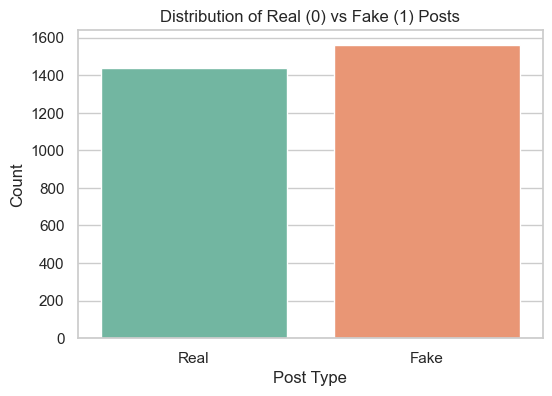

In [122]:
 # Distribution of Real vs. Fake Posts
plt.figure(figsize=(6,4))
sns.countplot(x='is_fake', data=df, palette='Set2')
plt.title('Distribution of Real (0) vs Fake (1) Posts')
plt.xlabel('Post Type')
plt.ylabel('Count')
plt.xticks([0,1], ['Real', 'Fake'])
plt.show()

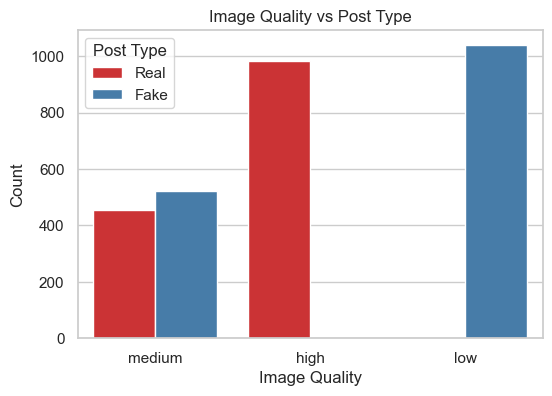

In [123]:
# Image Quality vs. Fake/Real Post
plt.figure(figsize=(6,4))
sns.countplot(x='image_quality', hue='is_fake', data=df, palette='Set1')
plt.title('Image Quality vs Post Type')
plt.xlabel('Image Quality')
plt.ylabel('Count')
plt.legend(title='Post Type', labels=['Real', 'Fake'])
plt.show()

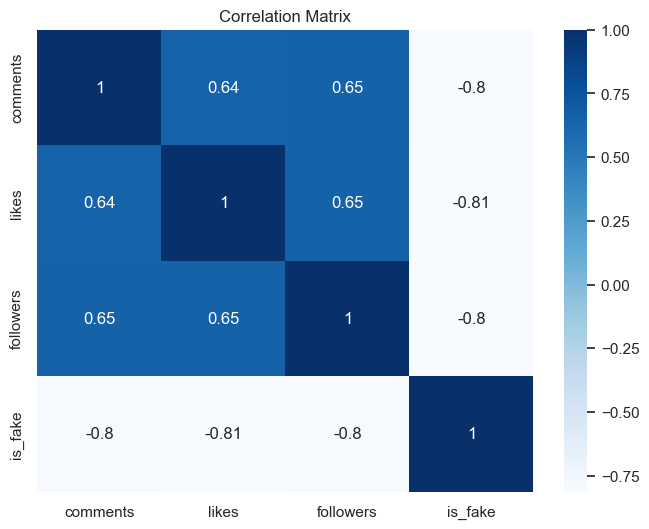

In [124]:
# Correlation Heatmap matrix of numeric features
plt.figure(figsize=(8,6))
sns.heatmap(df[['comments', 'likes', 'followers', 'is_fake']].corr(), annot=True, cmap='Blues')
plt.title("Correlation Matrix")
plt.show()

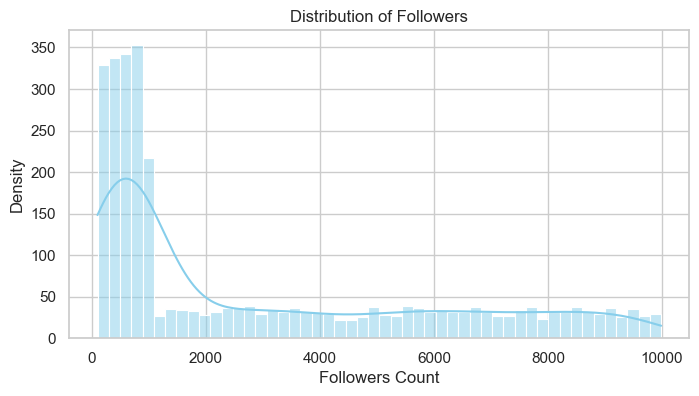

In [125]:
#Followers Distribution
plt.figure(figsize=(8,4))
sns.histplot(data=df, x='followers', bins=50, kde=True, color='skyblue')
plt.title("Distribution of Followers")
plt.xlabel("Followers Count")
plt.ylabel("Density")
plt.show()

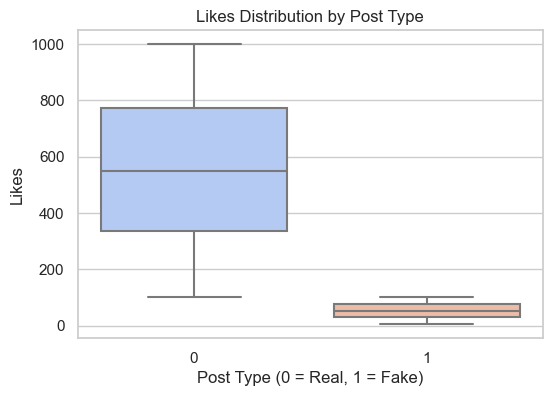

In [126]:
# Boxplot - Likes by Post Type
plt.figure(figsize=(6,4))
sns.boxplot(x='is_fake', y='likes', data=df, palette='coolwarm')
plt.title("Likes Distribution by Post Type")
plt.xlabel("Post Type (0 = Real, 1 = Fake)")
plt.ylabel("Likes")
plt.show()

 # Feature Extraction (TF-IDF for text + Numeric features)

In [127]:
# TF-IDF vectorization for cleaned caption
tfidf = TfidfVectorizer(max_features=500)
tfidf_features = tfidf.fit_transform(df['clean_caption']).toarray()

# Combine TF-IDF with other numerical features
numerical_features = df[['comments', 'likes', 'followers', 'image_quality_encoded']].values
X = np.hstack((tfidf_features, numerical_features))

# Target variable
y = df['is_fake']

In [128]:
df

,username,caption,image_quality,comments,likes,followers,is_fake,clean_caption,image_quality_encoded
0,garciamarcus,Technology ready hit travel age provide. doubl...,medium,1,100,912,1,technology ready hit travel age provide double...,2
1,ericlawrence,Item situation seem doctor couple have doctor ...,high,158,403,5667,0,item situation seem doctor couple have doctor ...,0
2,katie11,Single actually important conference eight add...,high,176,316,8743,0,single actually important conference eight add...,0
3,garycarlson,Report street drive allow region. guaranteed i...,low,18,55,407,1,report street drive allow region guaranteed in...,1
4,catherine62,Really interview discussion data. double your ...,low,17,39,945,1,really interview discussion data double your m...,1
...,...,...,...,...,...,...,...,...,...
2995,bryan36,Inside such above edge watch traditional. behi...,high,71,448,2157,0,inside such above edge watch traditional behin...,0
2996,dburton,Significant identify country certain. double y...,low,9,45,552,1,significant identify country certain double yo...,1
2997,breanna29,Free physical heavy most. special discount,high,192,261,3239,0,free physical heavy most special discount,0
2998,wgonzalez,Industry later determine full accept realize t...,low,19,19,967,1,industry later determine full accept realize t...,1


# Train/Test Split

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train a Machine Learning Model (Random Forest)

In [141]:
from sklearn.ensemble import RandomForestClassifier

RandomForestClassifier()

In [142]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [131]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       301
           1       1.00      1.00      1.00       299

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600

Confusion Matrix:
 [[301   0]
 [  0 299]]


# Deep Learning Model (Feedforward Neural Network)

In [133]:
# Simple Neural Network
model = Sequential()
model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [134]:
# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.4948 - loss: 17.2958 - val_accuracy: 0.5017 - val_loss: 5.1073
Epoch 2/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5000 - loss: 4.5061 - val_accuracy: 0.5033 - val_loss: 2.1739
Epoch 3/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5201 - loss: 2.5843 - val_accuracy: 0.5967 - val_loss: 0.8948
Epoch 4/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5887 - loss: 1.7442 - val_accuracy: 0.6933 - val_loss: 0.4775
Epoch 5/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6187 - loss: 1.4288 - val_accuracy: 0.5900 - val_loss: 1.2737


In [135]:
# Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print("Neural Network Accuracy:", accuracy)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6089 - loss: 1.2062 
Neural Network Accuracy: 0.5899999737739563
